## Transfer Learning Demo

This is a very simple demo to show how linear supervised transfer learning works. For more information about the approach, please refer to the README or to [Paaßen et al. (2018)](https://arxiv.org/abs/1711.09256).

In this demo, we consider a two-dimensional data set of three Gaussian clusters, one per class, ordered along a line.

In [1]:
# generate the source space data
import numpy as np
X = np.random.randn(300, 2) * 0.2
y = np.concatenate([-np.ones((100)), np.zeros((100)), np.ones((100))])
X[:, 0] -= y

# show the dataset
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

<Figure size 640x480 with 1 Axes>

In a first step, we need to construct a model of the density in the source space. We do this via a labelled Gaussian mixture model. The necessary methods to train such a model are part of this library.

In [2]:
import lgmm
model = lgmm.SLGMM()
# fit this model to the data
model = model.fit(X, y)

/usr/lib64/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Our target data has the same marginal density $p(\vec x)$, but the conditional distribution $P(y|\vec x)$ is flipped. As such, unsupervised methods are necessarily unable to learn the transfer function.

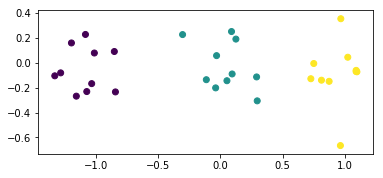

In [3]:
# generate the target space data
import numpy as np
Xtar = np.random.randn(30, 2) * 0.2
ytar = np.concatenate([-np.ones((10)), np.zeros((10)), np.ones((10))])
Xtar[:, 0] += ytar

# show the dataset
plt.scatter(Xtar[:, 0], Xtar[:, 1], c=ytar)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We now perform transfer learning to map the target space data to the source space. This is done by maximizing the likelihood of the target space data according to the model we learned in the source space.

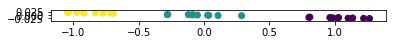

In [4]:
# initialize a transfer learning model
import transfer_learning
tl_model = transfer_learning.SLGMM_transfer_model(model)
# fit it to the data
tl_model.fit(Xtar, ytar)
# predict the position of the data in the source space
Xtrans = tl_model.predict(Xtar)
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=ytar)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

And indeed, the data are mapped to their original position. Note how the second dimension is squashed to minimize the distance of the data to the Gaussian mean.

Interestingly, because our learned transfer function generalizes across classes, we do not even need training data from all classes for transfer learning. For example, we can select the +1 class and still learn the correct function.

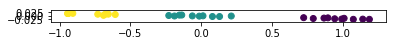

In [5]:
# fit it to the data, but with only two classes instead of all three
tl_model.fit(Xtar[ytar < 1], ytar[ytar < 1])
# predict the position of the data in the source space
Xtrans = tl_model.predict(Xtar)
plt.scatter(Xtrans[:, 0], Xtrans[:, 1], c=ytar)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()